In [2]:
# File: diabetes_prediction_pipeline.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Load dataset
data_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
    "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]
df = pd.read_csv(data_url, names=column_names)

In [4]:
# Exploratory Data Analysis
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Statistical Summary:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469 

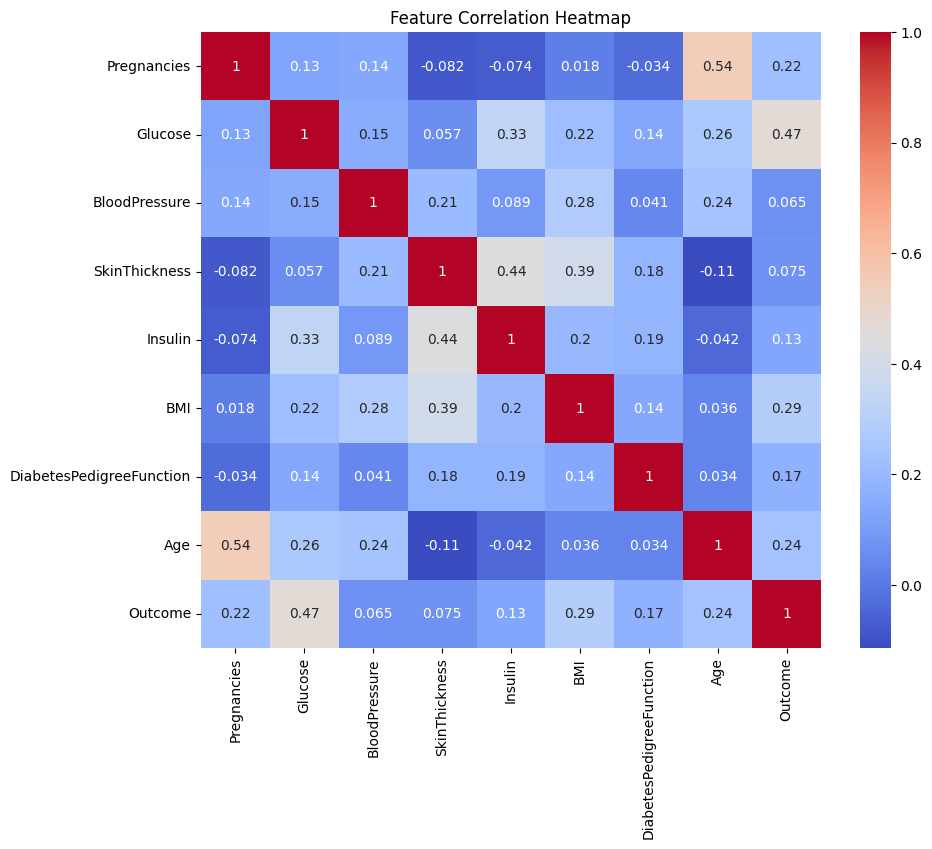

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Replace zero values in relevant columns with NaN for imputation
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [8]:
# Split data
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Pipeline
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("classifier", RandomForestClassifier(random_state=42))
])


Initial Model Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.63      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



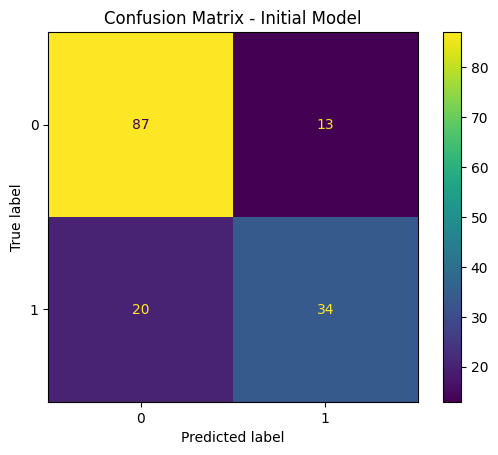

In [11]:
# Train initial model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nInitial Model Evaluation:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.title("Confusion Matrix - Initial Model")
plt.show()



Best Parameters:
{'classifier__max_depth': 15, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Tuned Model Evaluation:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



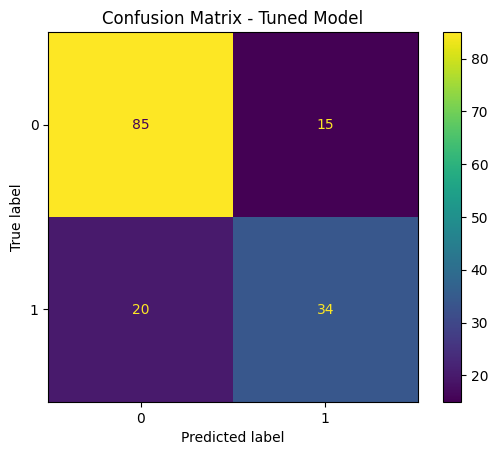

In [12]:
# Hyperparameter tuning
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 5, 10, 15],
    "classifier__min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\nTuned Model Evaluation:")
print(classification_report(y_test, y_pred_best))

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix - Tuned Model")
plt.show()

In [13]:
# Summary
print("\nSummary:")
print("Preprocessing helped by replacing missing values and scaling features.")
print("RandomForest hyperparameters such as max_depth and n_estimators improved performance.")


Summary:
Preprocessing helped by replacing missing values and scaling features.
RandomForest hyperparameters such as max_depth and n_estimators improved performance.
